# Projet 6

créer un algorithme de détection de faux billets

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import datetime 
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from scipy.stats import norm
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

In [ ]:
# fonction clé primaire
def test_primary_key(df, column):
        if len(df) == len(df[column].drop_duplicates()):
                print("la clé  est unique")
        else : print('la clé n est pas unique')
        print('___')

#fonction is_null
def test_is_null(df):
    display((df.isnull().sum()))
    display(sns.heatmap(df.isnull()))

#fonction affichage médiane
def func_affichage_mediane(df, column, unite):
    print('la valeur mediane est de {}'.format(df[column].median()), unite)

#fonction affichage moyenne
def func_affichage_moyenne(df, column, unite):
    print('la valeur moyenne est de {}'.format(df[column].mean()), unite)

#Au préalable on crée une fonction pour connaître notre nombre de ligne supprimées
def pourcentage_supprimé(df, df_supprimé):
    print('Le pourcentage de lignes supprimées est de: {:.4f}'.format(len(df_supprimé)/len(df)*100), '%.',\
          '{}'.format(len(df_supprimé)), 'lignes ont été supprimées' ) 
    print('sur {}'.format(len(df_supprimé)+len(df)))



In [ ]:
df_notes = pd.read_csv('notes.csv')
df_notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


# Mission 0

In [ ]:
#effectuez une analyse univariée et bivariée

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<AxesSubplot:>

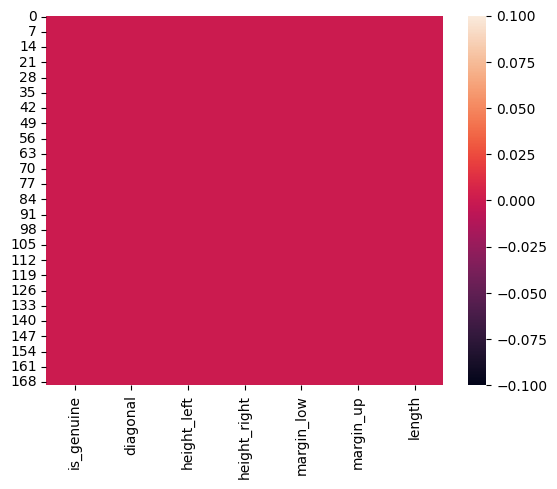

In [ ]:
test_is_null(df_notes)

#demander à Manuel comment faire cette fonction

def global_function_analyse_univariée(df):
    liste_columns = df.columns.to_list()
    longeur_liste_columns = len(df)

    def func_affichage_mediane(df, column):
    print('la valeur mediane est de {}'.format(df[column].median()))

    def func_affichage_moyenne(df, column):
        print('la valeur moyenne est de {}'.format(df[column].mean()))

In [ ]:
def short_function_analyse_univariée(df,column):
    print('la valeur mediane de {} est de {}'.format(column, df[column].median()))
    print('la valeur moyenne de {} est de {}'.format(column, df[column].mean()))
    print('___')

In [ ]:
df_notes.columns.to_list()

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [ ]:
short_function_analyse_univariée(df_notes,'is_genuine')
short_function_analyse_univariée(df_notes,'diagonal')
short_function_analyse_univariée(df_notes,'height_left')
short_function_analyse_univariée(df_notes,'height_right')
short_function_analyse_univariée(df_notes,'margin_low')
short_function_analyse_univariée(df_notes,'margin_up')
short_function_analyse_univariée(df_notes,'length')

la valeur mediane de is_genuine est de 1.0
la valeur moyenne de is_genuine est de 0.5882352941176471
___
la valeur mediane de diagonal est de 171.945
la valeur moyenne de diagonal est de 171.94058823529411
___
la valeur mediane de height_left est de 104.055
la valeur moyenne de height_left est de 104.06635294117646
___
la valeur mediane de height_right est de 103.95
la valeur moyenne de height_right est de 103.92811764705881
___
la valeur mediane de margin_low est de 4.45
la valeur moyenne de margin_low est de 4.612117647058823
___
la valeur mediane de margin_up est de 3.17
la valeur moyenne de margin_up est de 3.1704117647058827
___
la valeur mediane de length est de 112.845
la valeur moyenne de length est de 112.5704117647059
___


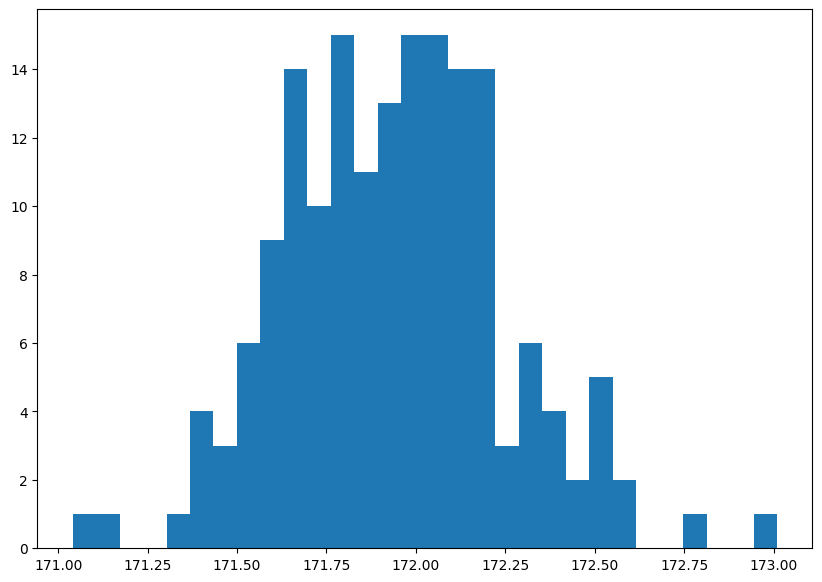

In [ ]:
#histogramme

plt.figure(figsize =(10, 7))
plt.hist(df_notes['diagonal'], bins=30)
plt.show()

#plt.savefig('histogramme_diagonale.png')

In [ ]:
df_notes.head(1)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83


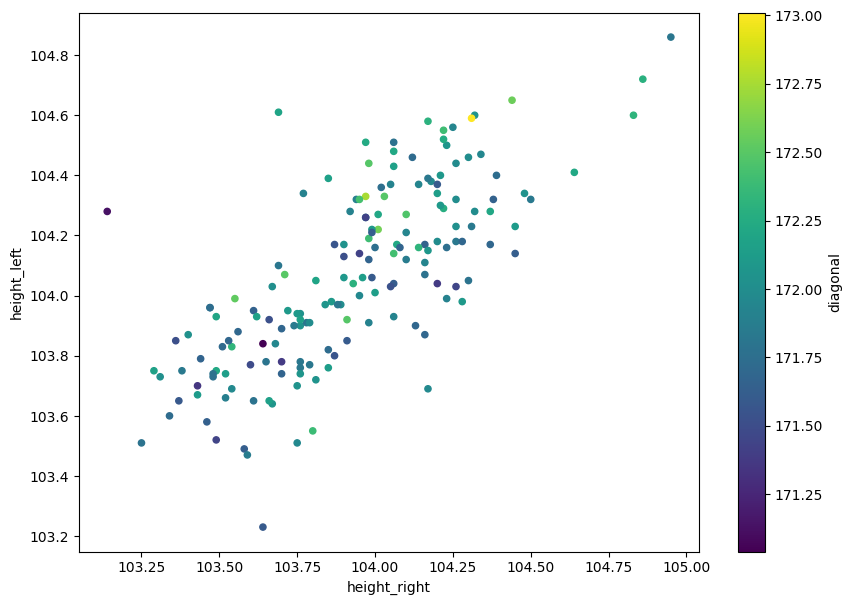

In [ ]:
scatterplot_right_left_diag = df_notes.plot.scatter(x='height_right',y='height_left', c='diagonal',colormap='viridis', figsize=(10,7))
#scatterplot_diag_left_right.figure.savefig('price__age_categorie.png')

# Mission 1

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;


- représentation des variables par le cercle des corrélations ;

- représentation des individus par les plans factoriels ;

- analyser de la qualité de représentation et la contribution des individus.

- Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

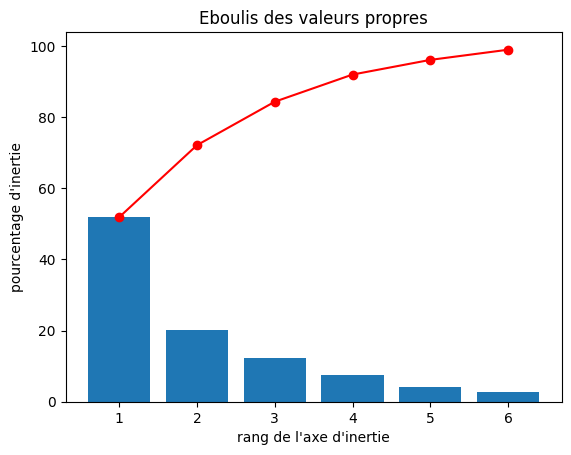

In [ ]:
# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
df_notes_pca = df_notes[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# préparation des données pour l'ACP
df_notes_pca = df_notes_pca.fillna(df_notes_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_notes_pca.values
names = df_notes.index #data["idCours"] pour avoir les intitulés
features = df_notes.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

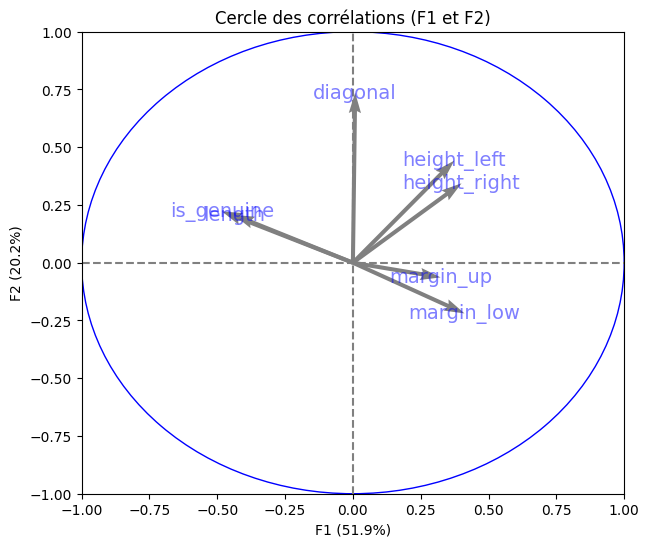

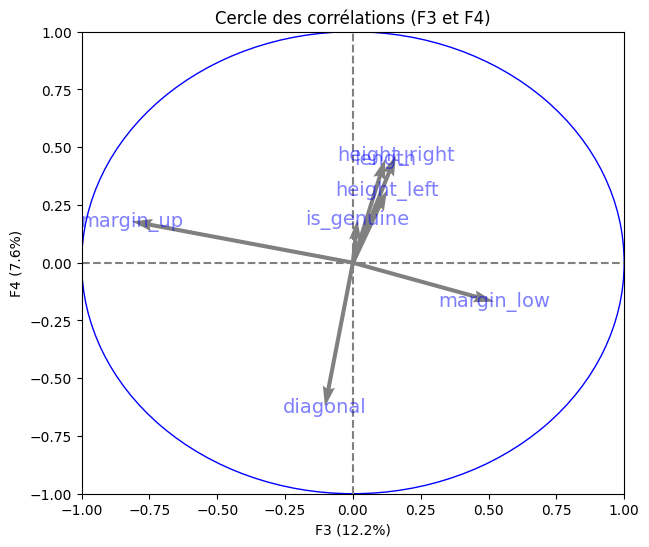

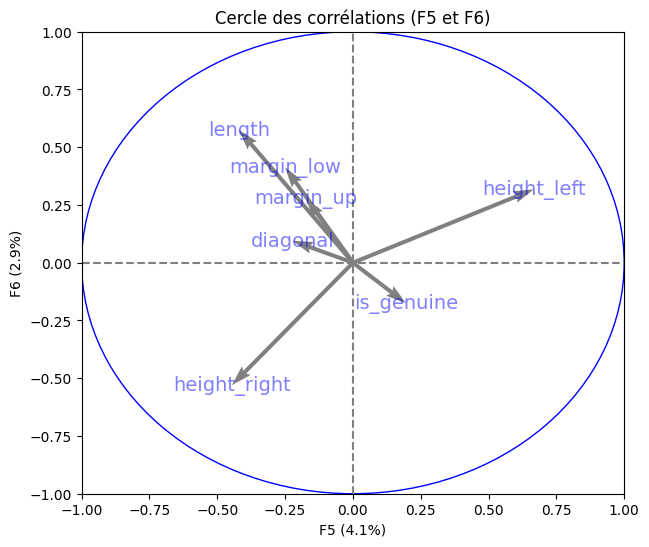

In [ ]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

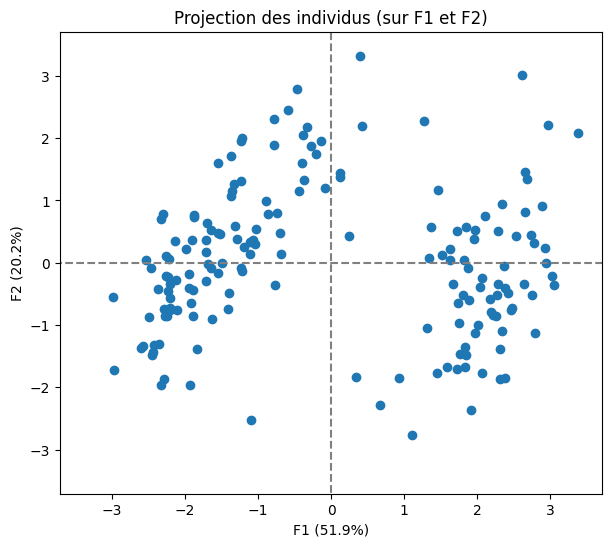

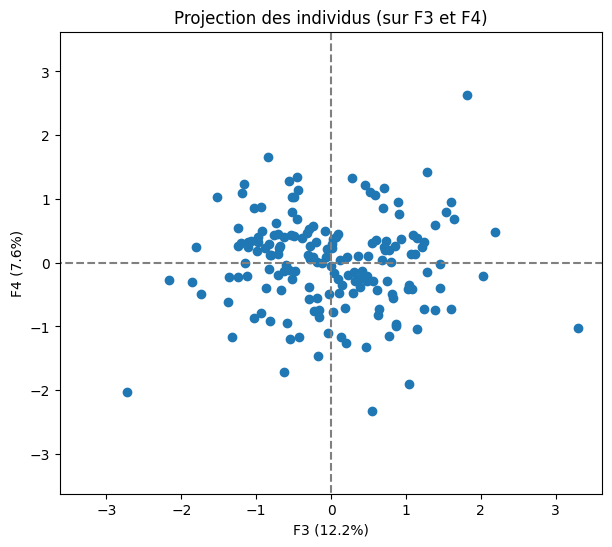

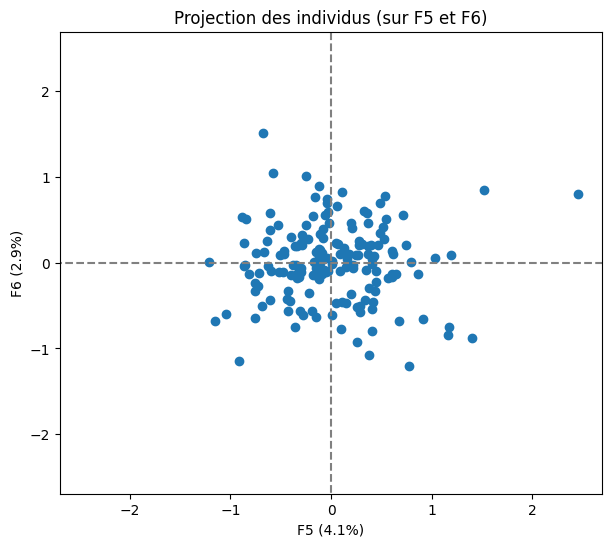

In [ ]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],
                         #labels = np.array(names)
                        )

plt.show()

# Mission 2

Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

In [ ]:
df_notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


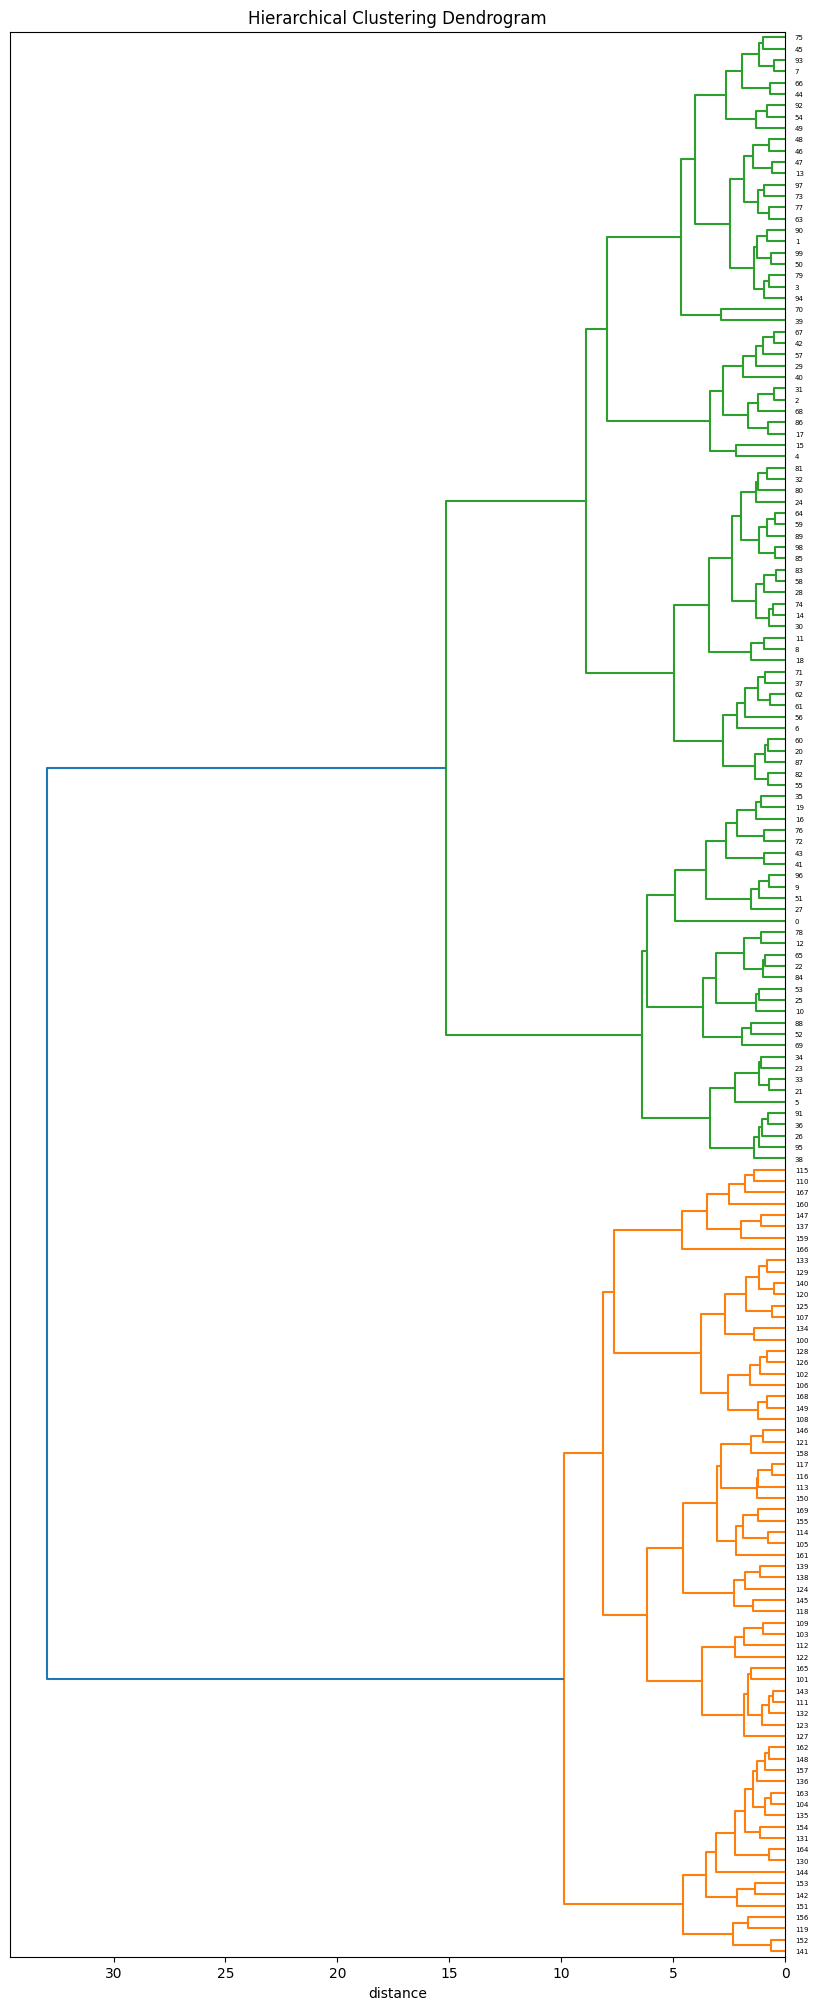

In [ ]:
# préparation des données pour le clustering
X = df_notes.values
names = df_notes.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

## K-means

/tmp/ipykernel_403/3363296230.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'viridis', alpha=.5)


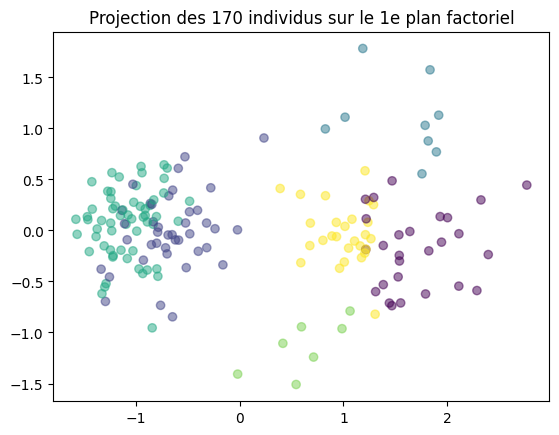

In [ ]:
# Nombre de clusters souhaités
n_clust = 6

# préparation des données pour le clustering
X = df_notes.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'viridis', alpha=.5)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Mission 3

Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [ ]:
df_notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


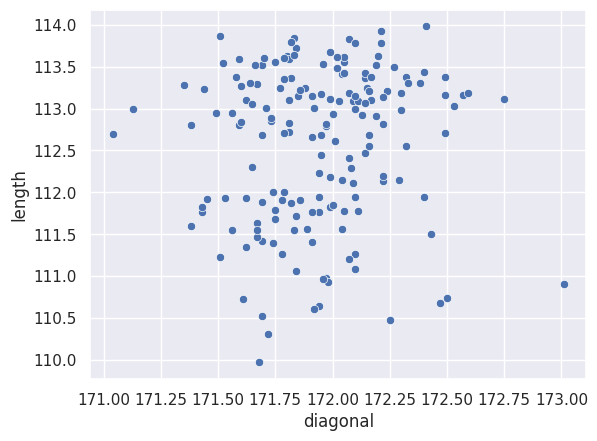

In [ ]:
sns.set()

ax = sns.scatterplot(x="diagonal", y="length", data=df_notes)

## Effectuer la régression logistique

In [ ]:
df_notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


### Test Train Split

In [ ]:
df_notes = pd.read_csv('notes.csv')

In [ ]:
# Centrer et réduire, et supprimer les lignes des nan 
# Il y a beaucoup plus de vrai billet que de faux, du coup 

# OPTION : ça un "imbalanced data set", il faut régler le problème  : over sampling with SMOTE

#  RL suppose l'abence d'outlier, donc si il y a, les enlever
# il faut tester la multicollineraty, RL suppose qu'il n'y pas de multi
# les variables explicatives doivent être corrélé de manière linéaire au log(y) --> heatmap des corrélations


In [ ]:
df_notes_pca.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [ ]:
import seaborn as sns

df_notes.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

df_notes = df_notes[['margin_low', 'length', 'is_genuine']]
X_train, X_test, y_train, y_test = train_test_split(df_notes.drop('is_genuine',axis=1), 
                                                    df_notes['is_genuine'], 
                                                    test_size=0.40, 
                                                    random_state=327)

In [ ]:
X_train.head()

,margin_low,length
0,4.52,112.83
18,3.60,113.24
168,4.73,111.87
162,5.68,111.55
159,4.21,110.31


In [ ]:
import statsmodels.api as sm

model = sm.Logit(y_test, X_test)

r = model.fit()

print(r.summary2())



Optimization terminated successfully.
         Current function value: 0.221309
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.648     
Dependent Variable: is_genuine       AIC:              34.0980   
Date:               2022-09-30 19:18 BIC:              38.5370   
No. Observations:   68               Log-Likelihood:   -15.049   
Df Model:           1                LL-Null:          -42.806   
Df Residuals:       66               LLR p-value:      9.2786e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
margin_low    -5.5440    1.3950  -3.9743  0.0001  -8.2780  -2.8099
length         0.2348    0.0578   4.0601  0.0000   0.1214   0.

### Training and Predicting

In [ ]:
#Note: LogisticRegression is not for regression but classification. The Y variable must be the classification class,

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
real_values = pd.read_csv('real_values.csv')
real_values.head(1)

,diagonale,height_left,height_right,margin_low,margin_up,length,id
0,170,100.3,101.1,4.1,2.1,110.2,id1


In [ ]:
real_values = real_values[['margin_low', 'length']]
real_values.head(1)

,margin_low,length
0,4.1,110.2


In [ ]:
X_test

,margin_low,length
129,4.94,111.93
134,5.54,112.80
90,4.21,113.24
61,3.69,113.14
71,4.06,113.10
...,...,...
36,4.08,113.44
144,5.66,112.95
97,4.01,112.95
79,3.89,113.60


In [ ]:
predictions2 = logmodel.predict(real_values)

In [ ]:
predictions2

array([False, False, False, False, False, False, False, False, False])

In [ ]:
predictions

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

### Evaluation


In [ ]:
#check precision, recall,f1-score using classification report

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#print(classification_report(y_test,predictions))
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[20,  2],
       [ 0, 46]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95        22
        True       0.96      1.00      0.98        46

    accuracy                           0.97        68
   macro avg       0.98      0.95      0.97        68
weighted avg       0.97      0.97      0.97        68



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ee07386-aa80-48b6-a794-cb2a65040702' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>